# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [106]:
# Importing all of the neccessary libraries
import pandas as pd
import numpy as np
import requests as req
import os
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt

In [107]:
# Downloading twitter-archive-enhanced.csv 
t_csv = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [108]:
# Creating folder for tsv file
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [109]:
# Downloading image_predictions.tsv from url using Requests library
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = req.get(url)
# Saving html to file
with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
    file.write(r.content)

In [110]:
# Verifying file has been created 
os.listdir(folder_name)

['image-predictions.tsv']

In [111]:
# Creating dataframe with tsv file
t_tsv = pd.read_csv(os.path.join(folder_name,'image-predictions.tsv'), sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [112]:
# Using Tweepy to query additional data
.
consumer_key = 'Hidden'
consumer_secret = 'Hidden'
access_token = 'Hidden'
access_secret = 'Hidden'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth)
tweet_ids = t_csv.tweet_id.values
len(tweet_ids)

count = 0
fails_dict = {}
start = timer()
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

SyntaxError: invalid syntax (<ipython-input-112-dfad5d8b8be3>, line 2)

In [113]:
# Loading tweet-json.txt to dataframe line by line
df_list = []
with open("tweet-json.txt") as file:
  lines = file.readlines()
for line in lines:
  df_list.append(json.loads(line))
t_api = pd.DataFrame(data=df_list)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [114]:
# Visually assessing twitter-archive-enhanced.csv as t_csv
# Need to assess names column, retweeted_status_id and rating denominator
t_csv

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [115]:
# Checking names for errors. Many names do not appear correct
t_csv.groupby('name').count()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo
name,,,,,,,,,,,,,,,,
Abby,2,0,0,2,2,2,0,0,0,2,2,2,2,2,2,2
Ace,1,0,0,1,1,1,0,0,0,1,1,1,1,1,1,1
Acro,1,0,0,1,1,1,0,0,0,1,1,1,1,1,1,1
Adele,1,0,0,1,1,1,0,0,0,1,1,1,1,1,1,1
Aiden,1,0,0,1,1,1,0,0,0,1,1,1,1,1,1,1
Aja,1,0,0,1,1,1,0,0,0,1,1,1,1,1,1,1
Akumi,1,0,0,1,1,1,0,0,0,1,1,1,1,1,1,1
Al,1,0,0,1,1,1,0,0,0,1,1,1,1,1,1,1
Albert,2,0,0,2,2,2,0,0,0,2,2,2,2,2,2,2


In [116]:
# Checking retweeted_status_id. 181 rows appear to be retweets
t_csv['retweeted_status_id'][t_csv['retweeted_status_id'].notnull()].count()

181

In [117]:
# Checking rating_denominator for errors. They should all be 10
t_csv.groupby('rating_denominator').count()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,name,doggo,floofer,pupper,puppo
rating_denominator,,,,,,,,,,,,,,,,
0,1,1,1,1,1,1,0,0,0,0,1,1,1,1,1,1
2,1,0,0,1,1,1,0,0,0,1,1,1,1,1,1,1
7,1,0,0,1,1,1,0,0,0,1,1,1,1,1,1,1
10,2333,73,73,2333,2333,2333,180,180,180,2278,2333,2333,2333,2333,2333,2333
11,3,0,0,3,3,3,1,1,1,3,3,3,3,3,3,3
15,1,1,1,1,1,1,0,0,0,0,1,1,1,1,1,1
16,1,1,1,1,1,1,0,0,0,0,1,1,1,1,1,1
20,2,1,1,2,2,2,0,0,0,1,2,2,2,2,2,2
40,1,0,0,1,1,1,0,0,0,1,1,1,1,1,1,1


In [118]:
# Programmatically assessing twitter-archive-enhanced.csv
# Timestamp is object instead of datetime
# expanded_urls column is missing data
t_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [119]:
# rating_numerator and rating denominator columns have min of 0 and rating_denominator has max higher than 10
t_csv.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [120]:
# Checking for tweet id duplicates
t_csv[t_csv.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [121]:
# Visually assessing image-predictions.tsv as t_tsv
# Going to review columns p1_dog, p2_dog and p3_dog to verify all images include a dog.
# p1, p2 and p3 have dog breed names that are not capitalized and some that are
t_tsv

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [122]:
# Assessing p1_dog, p2_dog and p3_dog for images that do not have dogs in them. 324 rows have no dogs.
t_tsv.groupby(['p1_dog','p2_dog','p3_dog']).count()

tweet_id  jpg_url  img_num    p1  p1_conf    p2  \
p1_dog p2_dog p3_dog                                                    
False  False  False        324      324      324   324      324   324   
              True          64       64       64    64       64    64   
       True   False         54       54       54    54       54    54   
              True         101      101      101   101      101   101   
True   False  False         43       43       43    43       43    43   
              True          91       91       91    91       91    91   
       True   False        155      155      155   155      155   155   
              True        1243     1243     1243  1243     1243  1243   

                      p2_conf    p3  p3_conf  
p1_dog p2_dog p3_dog                          
False  False  False       324   324      324  
              True         64    64       64  
       True   False        54    54       54  
              True        101   101      101  
True   False  False        43    43       43  
              True         91    91       91  
       True   False       155   155      155  
              True       1243  1243     1243

In [123]:
# Programmatically assessing image-predictions.tsv
t_tsv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [124]:
# Visually assessing tweet-json.txt as t_api
# Columns contributors,coordinates and geo do not appear to have any data in them
t_api

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,None,...,False,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,None,...,False,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,None,...,False,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,None,None,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,None,...,False,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,None,None,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,None,...,False,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,None,None,Sat Jul 29 00:08:17 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...",20562,False,Here we have a majestic great white breaching ...,None,...,False,NaN,NaN,NaN,3261,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,None,None,Fri Jul 28 16:27:12 +0000 2017,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...",12041,False,Meet Jax. He enjoys ice cream so much he gets ...,None,...,False,NaN,NaN,NaN,2158,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,None,None,Fri Jul 28 00:22:40 +0000 2017,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...",56848,False,When you watch your owner call another dog a g...,None,...,False,NaN,NaN,NaN,16716,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
8,None,None,Thu Jul 27 16:25:51 +0000 2017,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 890609177319665665, 'id_str'...",28226,False,This is Zoey. She doesn't want to be one of th...,None,...,False,NaN,NaN,NaN,4429,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
9,None,None,Wed Jul 26 15:59:51 +0000 2017,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890240245463175168, 'id_str'...",32467,False,This is Cassie. She is a college pup. Studying...,None,...,False,NaN,NaN,NaN,7711,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835'

In [125]:
# Programmatically assessing tweet-json.txt as t_api
# Columns contributors,coordinates and geo do not appear to have any data in them
# Column place has one row with data
# Created_at wrong datatype object instead of datetime
t_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2354 non-null object
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null object
id                               2354 non-null int64
id_str                           2354 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null obj

In [126]:
# Finding duplicated columns
all_columns = pd.Series(list(t_csv) + list(t_tsv) + list(t_api))
all_columns[all_columns.duplicated()]

17                 tweet_id
42    in_reply_to_status_id
44      in_reply_to_user_id
57                   source
dtype: object

### Quality issues
1.t_csv 59 rows are missing expanded_urls

2.t_csv Many of the dog names appear to have been incorrectly loaded in csv file. Names include: a,actually,all,an,by,getting,his,incredibly,infuriating,just,life,light,mad,my,not,
officially,old,one,quite,space,such,the,this,unacceptable,very.  

3.t_csv 23 rows do not have 10 as the denominator in rating_denominator column 

4.t_csv 181 rows are retweets RT@

5.t_csv timestamp column is object instead of datetime

6.t_tsv 324 rows have no dog detected in the photo

7.t_tsv some of the dog breeds in p1,p2 and p3 are capitalized and some are not

8.t_api columns contributors, coordinates and geo are empty. Column place only have one entry

### Tidiness issues
1.t_csv columns doggo, floofer, pupper and puppo should be combined into one column

2.All three tables can be combined into one and many columns can be dropped

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [127]:
# Make copies of original pieces of data
csv_clean = t_csv.sort_values('tweet_id').copy()
tsv_clean = t_tsv.sort_values('tweet_id').copy()
api_clean = t_api.sort_values('id').copy()

In [128]:
# Creating copies of tweet ids and making them indexes for each table so they can be joined later.
csv_clean['id_index'] = csv_clean.loc[:, 'tweet_id']
csv_clean.set_index('id_index', inplace=True)
tsv_clean['id_index'] = tsv_clean.loc[:, 'tweet_id']
tsv_clean.set_index('id_index', inplace=True)
api_clean['id_index'] = api_clean.loc[:, 'id']
api_clean.set_index('id_index', inplace=True)

In [129]:
# Changing the column name so there will not be duplicates when tables are joined.
csv_clean.rename(columns = {'tweet_id':'csv_id','source':'csv_source', }, inplace = True)

### Issue #1: t_csv 59 rows are missing expanded_urls

#### Define: 59 rows do not have expanded_urls. Dropping rows

#### Code

In [130]:
# Dropping all rows with no values in expanded_urls column
csv_clean = csv_clean[csv_clean.expanded_urls.notnull()]

#### Test

In [131]:
# Verifying there are no null values in expanded_urls column
csv_clean[csv_clean.expanded_urls.isna()].expanded_urls.count()

0

### Issue #2: t_csv Many of the dog names appear to have been incorrectly loaded in csv file.

#### Define: Names include: a,actually,all,an,by,getting,his,incredibly,infuriating,just,life,light,mad,my,not,officially,old,one,quite,space, such,the,this,unacceptable,very. Since there are many rows with none as the name, will update these with 'None'.

#### Code

In [132]:
# Creating a list of the invalid names
n = ['a', 'actually', 'all', 'an', 'by',
     'getting', 'his', 'incredibly', 'infuriating',
     'just', 'life', 'light', 'mad', 'my', 'not',
     'officially', 'old', 'one', 'quite', 'space',
     'such', 'the', 'this', 'unacceptable','very']
# Using a for statement to find and replace all invalid names with 'None'
for i in n:
    csv_clean['name'].replace(to_replace=i, value='None',inplace=True)

#### Test

In [133]:
# Verifying the invalid names are gone
csv_clean.groupby('name').count()

,csv_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,csv_source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo
name,,,,,,,,,,,,,,,,
Abby,2,0,0,2,2,2,0,0,0,2,2,2,2,2,2,2
Ace,1,0,0,1,1,1,0,0,0,1,1,1,1,1,1,1
Acro,1,0,0,1,1,1,0,0,0,1,1,1,1,1,1,1
Adele,1,0,0,1,1,1,0,0,0,1,1,1,1,1,1,1
Aiden,1,0,0,1,1,1,0,0,0,1,1,1,1,1,1,1
Aja,1,0,0,1,1,1,0,0,0,1,1,1,1,1,1,1
Akumi,1,0,0,1,1,1,0,0,0,1,1,1,1,1,1,1
Al,1,0,0,1,1,1,0,0,0,1,1,1,1,1,1,1
Albert,2,0,0,2,2,2,0,0,0,2,2,2,2,2,2,2


### Issue #3: t_csv 23 rows do not have 10 as the denominator in rating_denominator column 

#### Define: All denominators are supposed to be 10. I will change all incorrect denominators to 10.

#### Code

In [134]:
# Updating all values in rating_denominator to 10
csv_clean['rating_denominator']= 10

#### Test

In [135]:
# Verifying no other values are in column
csv_clean.groupby('rating_denominator').count()

,csv_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,csv_source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,name,doggo,floofer,pupper,puppo
rating_denominator,,,,,,,,,,,,,,,,
10,2297,23,23,2297,2297,2297,180,180,180,2297,2297,2297,2297,2297,2297,2297


### Issue #4: t_csv 181 rows are retweets RT@

#### Define: Retweets are not supposed to be included in this data. Will drop all retweets.

#### Code

In [136]:
# Dropping all retweeted rows
csv_clean = csv_clean[csv_clean.retweeted_status_timestamp.isna()]

#### Test

In [137]:
# No values in retweeted columns so RT rows have been dropped
csv_clean.count()

csv_id                        2117
in_reply_to_status_id           23
in_reply_to_user_id             23
timestamp                     2117
csv_source                    2117
text                          2117
retweeted_status_id              0
retweeted_status_user_id         0
retweeted_status_timestamp       0
expanded_urls                 2117
rating_numerator              2117
rating_denominator            2117
name                          2117
doggo                         2117
floofer                       2117
pupper                        2117
puppo                         2117
dtype: int64

In [138]:
# Dropping retweet columns since they are no longer needed
csv_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

In [139]:
# Verifying columns are gone
csv_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 666020888022790149 to 892420643555336193
Data columns (total 14 columns):
csv_id                   2117 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2117 non-null object
csv_source               2117 non-null object
text                     2117 non-null object
expanded_urls            2117 non-null object
rating_numerator         2117 non-null int64
rating_denominator       2117 non-null int64
name                     2117 non-null object
doggo                    2117 non-null object
floofer                  2117 non-null object
pupper                   2117 non-null object
puppo                    2117 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 248.1+ KB


### Issue #5: t_csv timestamp column is object instead of datetime

#### Define: timestamp in csv_clean needs to be converted to datetime. Will also update api_clean column created_at datatype to datetime.

#### Code

In [140]:
# Converting datatype
csv_clean['timestamp'] = pd.to_datetime(csv_clean['timestamp'])

In [141]:
# Converting datatype
api_clean['created_at'] = pd.to_datetime(api_clean['created_at'])

#### Test

In [142]:
# Verifying datatype was converted 
csv_clean.dtypes

csv_id                            int64
in_reply_to_status_id           float64
in_reply_to_user_id             float64
timestamp                datetime64[ns]
csv_source                       object
text                             object
expanded_urls                    object
rating_numerator                  int64
rating_denominator                int64
name                             object
doggo                            object
floofer                          object
pupper                           object
puppo                            object
dtype: object

In [143]:
# Verifying datatype was converted 
api_clean.dtypes

contributors                             object
coordinates                              object
created_at                       datetime64[ns]
display_text_range                       object
entities                                 object
extended_entities                        object
favorite_count                            int64
favorited                                  bool
full_text                                object
geo                                      object
id                                        int64
id_str                                   object
in_reply_to_screen_name                  object
in_reply_to_status_id                   float64
in_reply_to_status_id_str                object
in_reply_to_user_id                     float64
in_reply_to_user_id_str                  object
is_quote_status                            bool
lang                                     object
place                                    object
possibly_sensitive                      

### Issue #6: t_tsv 324 rows have no dog detected in the photo

#### Define: Only pictures of dogs are supposed to be included in this data, we will drop these rows.

#### Code

In [144]:
# Finding the tweet_id for each imagine that does not have a dog detected
x = tsv_clean.tweet_id[(tsv_clean.p1_dog == False) & (tsv_clean.p2_dog == False) & (tsv_clean.p3_dog == False)]
# Dropping all rows by index
for i in x:
  tsv_clean.drop(index=[i], inplace=True) 

#### Test

In [145]:
# Varifying no images are missing dogs
tsv_clean.tweet_id[(tsv_clean.p1_dog == False) & (tsv_clean.p2_dog == False) & (tsv_clean.p3_dog == False)]
tsv_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 666020888022790149 to 892177421306343426
Data columns (total 12 columns):
tweet_id    1751 non-null int64
jpg_url     1751 non-null object
img_num     1751 non-null int64
p1          1751 non-null object
p1_conf     1751 non-null float64
p1_dog      1751 non-null bool
p2          1751 non-null object
p2_conf     1751 non-null float64
p2_dog      1751 non-null bool
p3          1751 non-null object
p3_conf     1751 non-null float64
p3_dog      1751 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 141.9+ KB


### Issue #7: t_tsv some of the dog breeds in p1,p2 and p3 are capitalized and some are not

#### Define: Since retweets are not supposed to be included in this data, we will drop these rows.

#### Code

In [146]:
# Updating columns to capitalized dog breed names
tsv_clean['p1'] = tsv_clean['p1'].str.capitalize()
tsv_clean['p2'] = tsv_clean['p2'].str.capitalize()
tsv_clean['p3'] = tsv_clean['p3'].str.capitalize()

#### Test

In [147]:
tsv_clean.groupby('p1').count()

,tweet_id,jpg_url,img_num,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
p1,,,,,,,,,,,
Acorn_squash,2,2,2,2,2,2,2,2,2,2,2
Afghan_hound,4,4,4,4,4,4,4,4,4,4,4
African_hunting_dog,1,1,1,1,1,1,1,1,1,1,1
Airedale,12,12,12,12,12,12,12,12,12,12,12
American_staffordshire_terrier,13,13,13,13,13,13,13,13,13,13,13
Angora,1,1,1,1,1,1,1,1,1,1,1
Appenzeller,2,2,2,2,2,2,2,2,2,2,2
Arabian_camel,2,2,2,2,2,2,2,2,2,2,2
Arctic_fox,3,3,3,3,3,3,3,3,3,3,3


### Issue #8: t_api columns contributors, coordinates and geo are empty. Column place only have one entry

#### Define: Will drop these columns

#### Code

In [148]:
# Dropping columns with no data
api_clean.drop(['contributors', 'coordinates', 'geo', 'place'], axis=1, inplace=True)

#### Test

In [149]:
api_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 666020888022790149 to 892420643555336193
Data columns (total 27 columns):
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
id                               2354 non-null int64
id_str                           2354 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null object
is_quote_status                  2354 non-null bool
lang                             2354 non-null object
poss

In [150]:
# Dropping more columns with little data to further clean table
api_clean.drop(['in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str',
                'in_reply_to_user_id', 'in_reply_to_user_id_str', 'quoted_status', 'quoted_status_id', 'quoted_status_id_str'], axis=1, inplace=True)

In [151]:
api_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 666020888022790149 to 892420643555336193
Data columns (total 19 columns):
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
id                               2354 non-null int64
id_str                           2354 non-null object
is_quote_status                  2354 non-null bool
lang                             2354 non-null object
possibly_sensitive               2211 non-null object
possibly_sensitive_appealable    2211 non-null object
retweet_count                    2354 non-null int64
retweeted                        2354 non-null bool
retweeted_status                 179 non-null object


### Issue #9: t_csv columns doggo, floofer, pupper and puppo should be combined into one column

#### Define: These four columns could be combined as a category column

#### Code

In [152]:
# Replacing 'None' with '' in columns so we can join them. 
csv_clean['doggo'].replace({'None': ''},inplace =True)
csv_clean['floofer'].replace({'None': ''},inplace =True)
csv_clean['pupper'].replace({'None': ''},inplace =True)
csv_clean['puppo'].replace({'None': ''},inplace =True)
# Creating an if statement if doggo column = '', will add remaining three columns
csv_clean.loc[csv_clean['doggo'] == '', 'doggo'] = csv_clean[['floofer', 'pupper', 'puppo']].agg(''.join, axis=1) 
# Renaming and dropping other columns
csv_clean.rename(columns = {'doggo':'doggo_rate'}, inplace = True)
csv_clean.drop(['floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test

In [153]:
csv_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 666020888022790149 to 892420643555336193
Data columns (total 11 columns):
csv_id                   2117 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2117 non-null datetime64[ns]
csv_source               2117 non-null object
text                     2117 non-null object
expanded_urls            2117 non-null object
rating_numerator         2117 non-null int64
rating_denominator       2117 non-null int64
name                     2117 non-null object
doggo_rate               2117 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 198.5+ KB


In [154]:
csv_clean.groupby('doggo_rate').count()

,csv_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,csv_source,text,expanded_urls,rating_numerator,rating_denominator,name
doggo_rate,,,,,,,,,,
,1779,20,20,1779,1779,1779,1779,1779,1779,1779
doggo,84,1,1,84,84,84,84,84,84,84
floofer,9,0,0,9,9,9,9,9,9,9
pupper,222,2,2,222,222,222,222,222,222,222
puppo,23,0,0,23,23,23,23,23,23,23


### Issue #10: All three tables can be combined into one and many columns can be dropped

#### Define combining all three tables using the tweet id as index.

#### Code

In [155]:
# Combining all three tables and dropping duplicate tweet ids
tweet_clean = tsv_clean.join(csv_clean)
tweet_clean = tweet_clean.join(api_clean)
tweet_clean.drop(['csv_id', 'id'], axis=1, inplace=True)

#### Test

In [156]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 666020888022790149 to 892177421306343426
Data columns (total 40 columns):
tweet_id                         1751 non-null int64
jpg_url                          1751 non-null object
img_num                          1751 non-null int64
p1                               1751 non-null object
p1_conf                          1751 non-null float64
p1_dog                           1751 non-null bool
p2                               1751 non-null object
p2_conf                          1751 non-null float64
p2_dog                           1751 non-null bool
p3                               1751 non-null object
p3_conf                          1751 non-null float64
p3_dog                           1751 non-null bool
in_reply_to_status_id            20 non-null float64
in_reply_to_user_id              20 non-null float64
timestamp                        1686 non-null datetime64[ns]
csv_source                       1686 non-null obje

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [157]:
tweet_clean.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [158]:
df = tweet_clean
brd1 = pd.DataFrame({
    'breed':df['p1'],
    'dog': df['p1_dog'],
    'rate':df['rating_numerator'],
    'fav':df['favorite_count']  
})
brd2 = pd.DataFrame({
    'breed':df['p2'],
    'dog': df['p2_dog'],
    'rate':df['rating_numerator'],
    'fav':df['favorite_count']  
})
brd3 = pd.DataFrame({
    'breed':df['p3'],
    'dog': df['p3_dog'],
    'rate':df['rating_numerator'],
    'fav':df['favorite_count']  
})
brd = pd.concat([brd1, brd2, brd3],         
                      ignore_index = True,
                      sort = True)
brd.drop(brd[brd.dog == False].index, inplace=True)
d = brd.groupby('breed').count()
d.sort_values('dog', ascending=False)

,dog,fav,rate
breed,,,
Golden_retriever,290,290,267
Labrador_retriever,283,283,267
Chihuahua,185,185,179
Pembroke,143,142,139
Cardigan,115,115,112
Pomeranian,109,109,104
Toy_poodle,105,105,103
Pug,97,97,92
Chow,96,96,92


In [159]:
rt = df.groupby('name').count()
rt = pd.DataFrame({'tweet_id':rt['tweet_id']})
rt = rt.drop(index='None')
rt = rt.nlargest(10,'tweet_id')
rt.sort_values('tweet_id', ascending=False)

,tweet_id
name,
Charlie,10
Cooper,10
Lucy,10
Oliver,9
Tucker,9
Penny,8
Daisy,7
Sadie,7
Winston,7


In [160]:
c = brd.groupby('breed').mean()
c.sort_values('rate', ascending=False)

,dog,fav,rate
breed,,,
Cairn,True,4452.076923,15.538462
Irish_setter,True,8205.040000,15.500000
Soft-coated_wheaten_terrier,True,6793.228571,15.470588
Dandie_dinmont,True,5094.214286,15.461538
Samoyed,True,11105.414286,14.757576
Great_pyrenees,True,11597.890909,14.500000
Wire-haired_fox_terrier,True,5741.000000,14.333333
Vizsla,True,7434.400000,13.655172
Cocker_spaniel,True,9285.210526,13.625000


### Insights:
1. The dog breed in the most images is Golden Retriever with 290 images.

2. The ten most common dog names in the data are: Charlie, Cooper, Lucy, Oliver, Tucker, Penny, Daisy, Sadie, Winston and Jax

3. The dog breed with the highest average rating is Cairn terrier with 15065.5 average rating

### Visualization

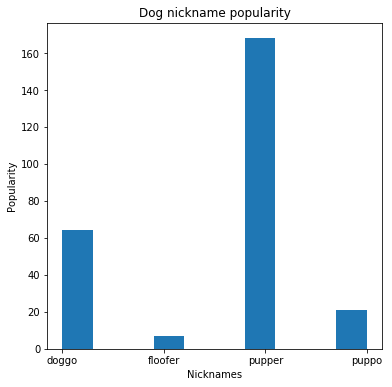

In [161]:
# Checking which is the most popular nicknames: 'doggo', 'floofer', 'pupper', 'puppo'
df['doggo_rate'].replace({'': None},inplace =True)
r = df[df['doggo_rate'].notnull()] 
plt.figure(figsize=(6, 6))
plt.hist(r['doggo_rate'])
plt.title('Dog nickname popularity')
plt.xlabel('Nicknames')
plt.ylabel('Popularity');

In [162]:
ch = pd.DataFrame({'rating_rank': c['rate']})
ch = ch.rank(axis=0,ascending=False)
ih = pd.DataFrame({'image_rank': d['dog']})
ih = ih.rank(axis=0,ascending=False)
rank = ch.join(ih)
rank.reset_index(inplace=True)
rank.sort_values('breed', ascending=False)

,breed,rating_rank,image_rank
117,Yorkshire_terrier,106.0,75.5
116,Wire-haired_fox_terrier,7.0,102.0
115,Whippet,110.0,46.5
114,West_highland_white_terrier,19.0,35.0
113,Welsh_springer_spaniel,100.0,67.0
112,Weimaraner,70.5,75.5
111,Walker_hound,116.0,91.0
110,Vizsla,8.0,49.5
109,Toy_terrier,73.0,32.0
108,Toy_poodle,74.0,7.0


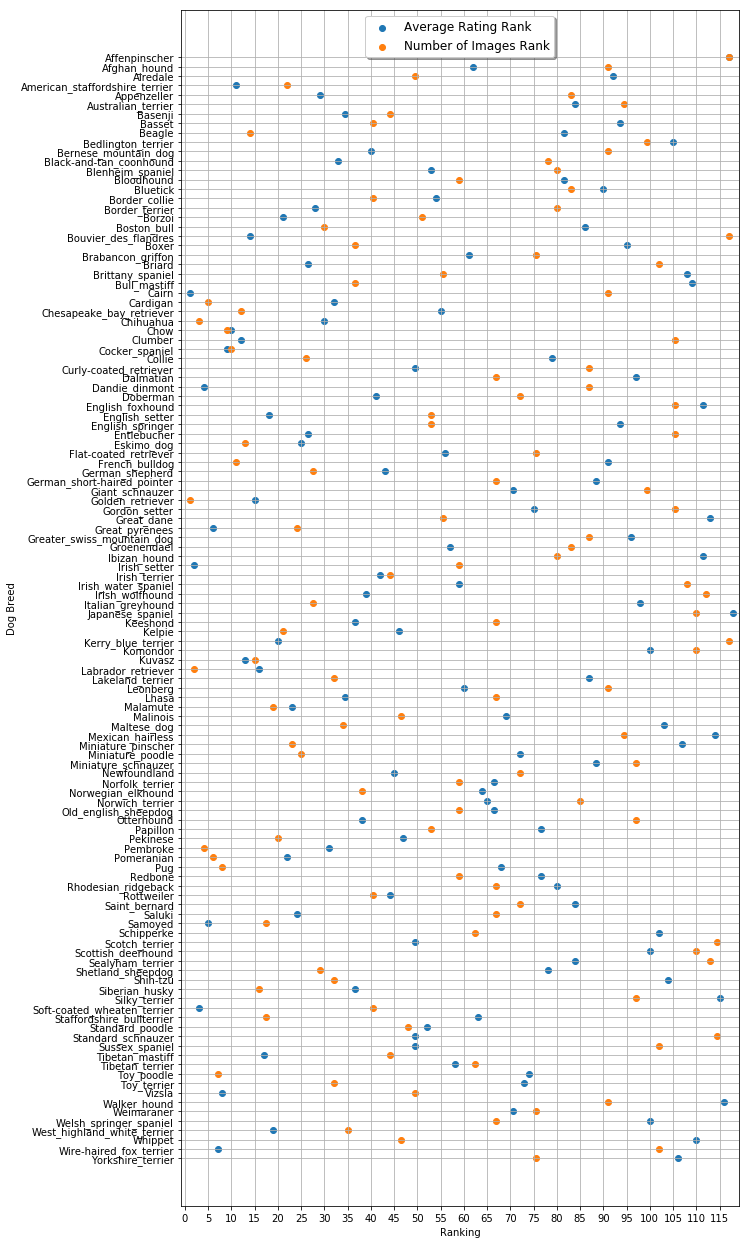

In [164]:
plt.figure(figsize=(10, 22))
plt.scatter(rank['rating_rank'], rank['breed'], label='Average Rating Rank')
plt.scatter(rank['image_rank'], rank['breed'], label='Number of Images Rank')
plt.grid()
plt.xlabel('Ranking')
plt.xticks(np.arange(0, 120, 5))
plt.ylabel('Dog Breed')
plt.margins(x=.01, y=.04)
plt.legend(loc='upper center', shadow=True, fontsize='large')
ax = plt.gca()
ax.invert_yaxis()
plt.show();